<a href="https://colab.research.google.com/github/tombackert/ml-stuff/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
ds = tfds.load('mnist', split='train', as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
## Converting data into dataframe

data = []
for image, label in tfds.as_numpy(ds):
  pixels = image.flatten()
  row = [label] + pixels.tolist()
  data.append(row)

columns = ['label'] + [f'pixel{i}' for i in range(784)]
df = pd.DataFrame(data, columns=columns)

In [ ]:
print(df.head(5))
print(df.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      4       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      7       0       0       0       0       0       0       0       0   
4      8       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [ ]:
## Data splitting

data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [ ]:
Y_train

array([3, 8, 2, ..., 4, 1, 5])

In [ ]:
X_train[:, 0].shape

(784,)

In [ ]:
## Core functions

def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2


In [ ]:
## Training Functions

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 10 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print("Accuracy: ", get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[7 9 0 ... 7 9 9] [3 8 2 ... 4 1 5]
Accuracy:  0.11659322033898305
Iteration:  10
[3 8 0 ... 3 8 5] [3 8 2 ... 4 1 5]
Accuracy:  0.1886779661016949
Iteration:  20
[3 8 9 ... 3 8 5] [3 8 2 ... 4 1 5]
Accuracy:  0.24525423728813558
Iteration:  30
[3 8 9 ... 1 1 5] [3 8 2 ... 4 1 5]
Accuracy:  0.29815254237288136
Iteration:  40
[3 8 9 ... 1 1 5] [3 8 2 ... 4 1 5]
Accuracy:  0.3449491525423729
Iteration:  50
[3 8 3 ... 1 1 5] [3 8 2 ... 4 1 5]
Accuracy:  0.38637288135593223
Iteration:  60
[3 8 3 ... 1 1 0] [3 8 2 ... 4 1 5]
Accuracy:  0.42133898305084744
Iteration:  70
[3 8 3 ... 1 1 0] [3 8 2 ... 4 1 5]
Accuracy:  0.45352542372881355
Iteration:  80
[3 9 3 ... 1 1 5] [3 8 2 ... 4 1 5]
Accuracy:  0.48459322033898306
Iteration:  90
[3 9 3 ... 1 1 5] [3 8 2 ... 4 1 5]
Accuracy:  0.5146949152542373
Iteration:  100
[3 9 3 ... 2 1 5] [3 8 2 ... 4 1 5]
Accuracy:  0.5411864406779661
Iteration:  110
[3 9 3 ... 2 1 5] [3 8 2 ... 4 1 5]
Accuracy:  0.5652033898305084
Iteration:  120
[3 9

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


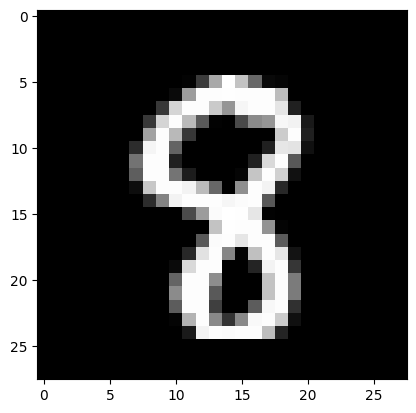

In [ ]:
test_prediction(1, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 4 1 4 0 3 7 7 5 7 1 0 9 6 9 2 4 1 3 2 0 8 7 1 9 4 8 3 3 0 9 8 2 0 7 8 6
 4 9 3 8 7 3 9 3 8 3 2 1 3 1 0 2 9 0 0 7 2 0 3 2 9 1 7 5 9 8 0 9 5 0 7 3 7
 8 3 0 2 3 0 2 0 3 5 2 9 3 0 4 9 7 7 5 6 6 1 8 1 1 1 5 0 6 8 0 8 4 9 0 4 4
 5 0 7 0 2 0 0 6 7 1 4 7 7 1 1 8 7 6 6 2 8 9 0 8 7 5 5 0 0 5 9 9 9 0 3 7 9
 3 3 5 8 0 7 2 2 6 0 8 7 1 6 9 9 7 4 9 4 7 5 6 6 9 8 8 4 0 9 0 9 0 8 3 3 4
 8 7 6 6 6 8 4 6 6 8 1 7 4 7 0 1 6 5 5 3 6 6 2 5 1 2 0 7 0 0 3 2 5 1 4 5 8
 8 9 6 2 2 1 0 4 1 3 0 8 0 7 0 9 0 8 0 7 4 0 0 7 4 1 5 1 1 6 0 4 4 5 5 2 7
 4 7 8 1 9 7 2 1 5 7 4 1 9 2 3 3 0 8 1 9 3 6 0 0 7 6 7 7 4 9 7 4 9 6 7 4 8
 6 3 5 5 0 0 3 6 8 4 7 2 3 7 1 3 4 5 4 3 1 9 9 2 4 3 1 0 5 7 1 4 9 2 1 4 4
 3 8 1 0 5 9 2 6 5 7 9 7 2 2 3 1 1 3 8 4 1 2 7 5 7 0 3 3 7 4 5 2 8 4 4 8 2
 7 5 8 3 8 1 0 8 8 1 3 8 0 6 5 9 1 6 4 2 5 0 9 2 2 3 0 6 8 9 9 4 6 6 0 3 7
 6 6 2 1 1 3 9 9 3 2 3 8 4 7 2 6 8 0 4 5 2 4 4 4 2 9 1 8 8 7 9 6 2 3 2 0 3
 0 5 9 4 8 9 3 0 8 7 1 3 4 3 1 1 1 1 2 4 7 8 3 3 3 0 6 9 2 6 1 8 5 2 3 1 3
 5 0 0 8 3 6 5 6 5 2 7 8 

0.795